In [1]:
import torch
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 10 ** 3
torch.manual_seed(1)

In [3]:
# make_blobs
center = 2
A = torch.cat((torch.randn(N, 2) + torch.tensor([center,center]), 0 * torch.ones(N, 1)), dim =1)
B = torch.cat((torch.randn(N, 2) + torch.tensor([-center,-center]), torch.ones(N, 1)), dim =1)
C = torch.cat((torch.randn(N, 2) + torch.tensor([center,-center]), 2 * torch.ones(N, 1)), dim =1)
D = torch.cat((torch.randn(N, 2) + torch.tensor([-center,center]), 3 * torch.ones(N, 1)), dim =1)

In [4]:
Data = torch.cat((A, B, C, D))
Data = Data[torch.randperm(Data.shape[0])]

Data.shape

torch.Size([4000, 3])

In [5]:
Data_train = Data[:int(3.6 * N)]
Data_test = Data[int(3.6 * N):,]

Data_train.shape, Data_test.shape

(torch.Size([3600, 3]), torch.Size([400, 3]))

In [6]:
X_train = Data_train[:, :2]
Y_train = Data_train[:, 2].type(torch.LongTensor)

X_test = Data_test[:, :2]
Y_test = Data_test[:, 2].type(torch.LongTensor)

X_train[0], Y_train[0], X_test[0], Y_test[0]

(tensor([-1.3789,  3.3617]), tensor(3), tensor([-1.6268,  1.0420]), tensor(3))

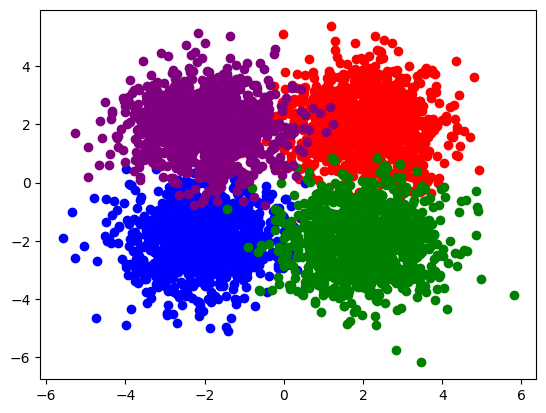

In [7]:
plt.scatter(A[:,0], A[:,1], c="red")
plt.scatter(B[:,0], B[:,1], c="blue")
plt.scatter(C[:,0], C[:,1], c="green")
plt.scatter(D[:,0], D[:,1], c="purple")

In [9]:
models = []
layer_sizes = np.arange(1, 8)

for size in layer_sizes:
    model = nn.Sequential(
        nn.Linear(2, size),
        nn.ReLU(),
        nn.Linear(size, 4)
    )
    models.append(model)

In [10]:
# data is fixed, model is varied

loss_fn   = torch.nn.CrossEntropyLoss()

n_epochs = 20
batch_size = 25
loss_list = []

for model in models:
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(n_epochs):
        for i in range(0, len(X_train), batch_size):
            Xbatch = X_train[i:i+batch_size]
            logits = model(Xbatch)
            y_pred = nn.Softmax(dim=1)(logits)
            y_true = Y_train[i:i+batch_size]
            loss = loss_fn(y_pred, y_true)
            loss_list.append(loss)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

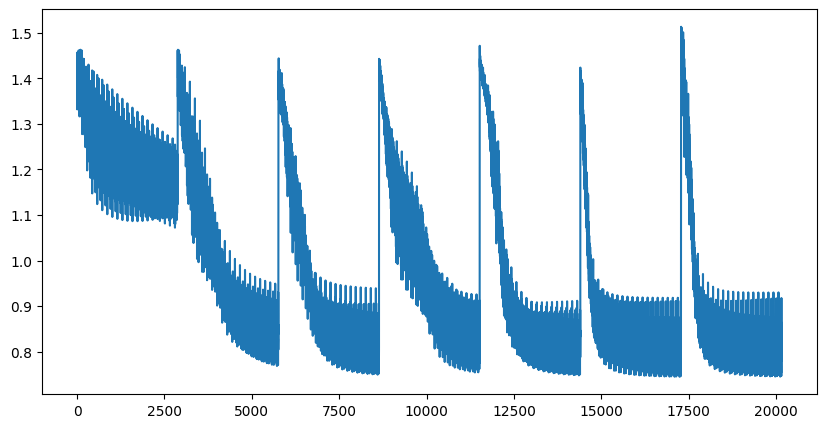

In [11]:
losses = []

for i in range(len(loss_list)):
    losses.append(loss_list[i].item())

    
plt.figure(figsize=(10, 5))
plt.plot(losses)

In [12]:
for i, model in enumerate(models):
    logits = model(X_test)
    pred_probab = nn.Softmax(dim=1)(logits)
    y_pred_test = pred_probab.argmax(1)
    accuracy = 100 * torch.sum(Y_test[:400] == y_pred_test[:400]).item() / 400
    print(f"Accuracy for Model {i + 1}: {accuracy:.2f}%")

Accuracy for Model 1: 60.00%
Accuracy for Model 2: 94.50%
Accuracy for Model 3: 95.25%
Accuracy for Model 4: 95.25%
Accuracy for Model 5: 96.00%
Accuracy for Model 6: 95.50%
Accuracy for Model 7: 95.00%


In [13]:
# model is fixed, data is varied

def create_data(center):
    torch.manual_seed(1)
    A = torch.cat((torch.randn(N, 2) + torch.tensor([center,center]), 0 * torch.ones(N, 1)), dim =1)
    B = torch.cat((torch.randn(N, 2) + torch.tensor([-center,-center]), torch.ones(N, 1)), dim =1)
    C = torch.cat((torch.randn(N, 2) + torch.tensor([center,-center]), 2 * torch.ones(N, 1)), dim =1)
    D = torch.cat((torch.randn(N, 2) + torch.tensor([-center,center]), 3 * torch.ones(N, 1)), dim =1)
    Data = torch.cat((A, B, C, D))
    Data = Data[torch.randperm(Data.shape[0])]
    Data_train = Data[:int(3.6 * N)]
    Data_test = Data[int(3.6 * N):,]
    X_train = Data_train[:, :2]
    Y_train = Data_train[:, 2].type(torch.LongTensor)
    X_test = Data_test[:, :2]
    Y_test = Data_test[:, 2].type(torch.LongTensor)
    
    return X_train, Y_train, X_test, Y_test

In [14]:
loss_fn   = torch.nn.CrossEntropyLoss()
centers = np.arange(0, 4.5, 0.5)

n_epochs = 10
batch_size = 25
loss_list = []

for center in centers:
    model = nn.Sequential(
        nn.Linear(2, 5),
        nn.ReLU(),
        nn.Linear(5, 4)
    )
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    X_train, Y_train, X_test, Y_test = create_data(center)
    for epoch in range(n_epochs):
        for i in range(0, len(X_train), batch_size):
            Xbatch = X_train[i:i+batch_size]
            Xbatch = Xbatch.to(model.parameters().__next__().dtype)
            logits = model(Xbatch)
            y_pred = nn.Softmax(dim=1)(logits)
            y_true = Y_train[i:i+batch_size]
            loss = loss_fn(y_pred, y_true)
            loss_list.append(loss)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

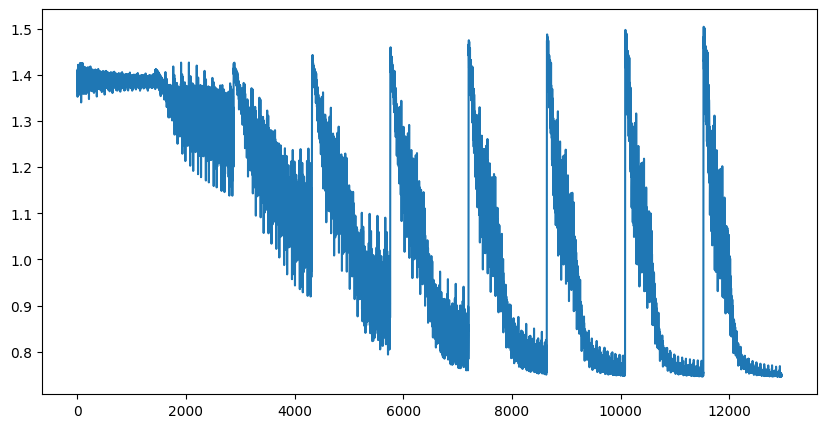

In [15]:
losses = []

for i in range(len(loss_list)):
    losses.append(loss_list[i].item())

plt.figure(figsize=(10, 5))
plt.plot(losses)